In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\Academics\\3rd_year_sem6\\PBL2\\datasets\\Electric-Car-Sales-by-Model-in-USA.csv')
df.fillna(0, inplace=True)
df.head()

,Make,Model,Logo,janv-12,Feb-12,mars-12,Apr-12,May-12,juin-12,juil-12,...,mars-19,Apr-19,May-19,juin-19,juil-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19
0,Chevrolet,Volt,https://www.carlogos.org/logo/Chevrolet-logo-2...,603.0,1626.0,3915.0,5377.0,7057.0,8817.0,10666.0,...,146667.0,147072.0,147481.0,147813.0,148063.0,148337.0,148687.0,148757.0,148907.0,149057
1,Toyota,Prius PHV,https://www.carlogos.org/logo/Toyota-logo-1989...,0.0,21.0,912.0,2566.0,3652.0,4347.0,5035.0,...,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345
2,Nissan,Leaf,https://www.carlogos.org/logo/Nissan-logo-2013...,676.0,1154.0,1733.0,2103.0,2613.0,3148.0,3543.0,...,122534.0,123485.0,124701.0,125857.0,126795.0,127912.0,128960.0,129847.0,130987.0,132214
3,Tesla,Model S,https://www.carlogos.org/logo/Tesla-logo-2003-...,0.0,0.0,0.0,0.0,0.0,12.0,31.0,...,147517.0,148342.0,149367.0,151117.0,152092.0,153142.0,154242.0,154992.0,156492.0,157992
4,Ford,C-Max Energi,https://www.carlogos.org/logo/Ford-logo-2003-1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231


In [3]:
def correct_month(dt):
    dt = dt.replace(' ', '-')
    m, y = dt.split('-')
    month_corrections = {'janv': 'jan', 'fev': 'feb', 'mars': 'mar', 'avr': 'apr', 'mai': 'may', 'juin': 'jun', 'juil': 'jul', 'aout': 'aug', 'sept': 'sep', 'oct': 'oct', 'nov': 'nov', 'dec': 'dec'}
    m = m.lower()
    if m in month_corrections:
        m = month_corrections[m]
    if len(y) == 2:
        y = '20' + y
    return f'{m.lower()}-{y}'

corrected_columns = [correct_month(col) if '-' in col or ' ' in col else col for col in df.columns]
df.columns = corrected_columns

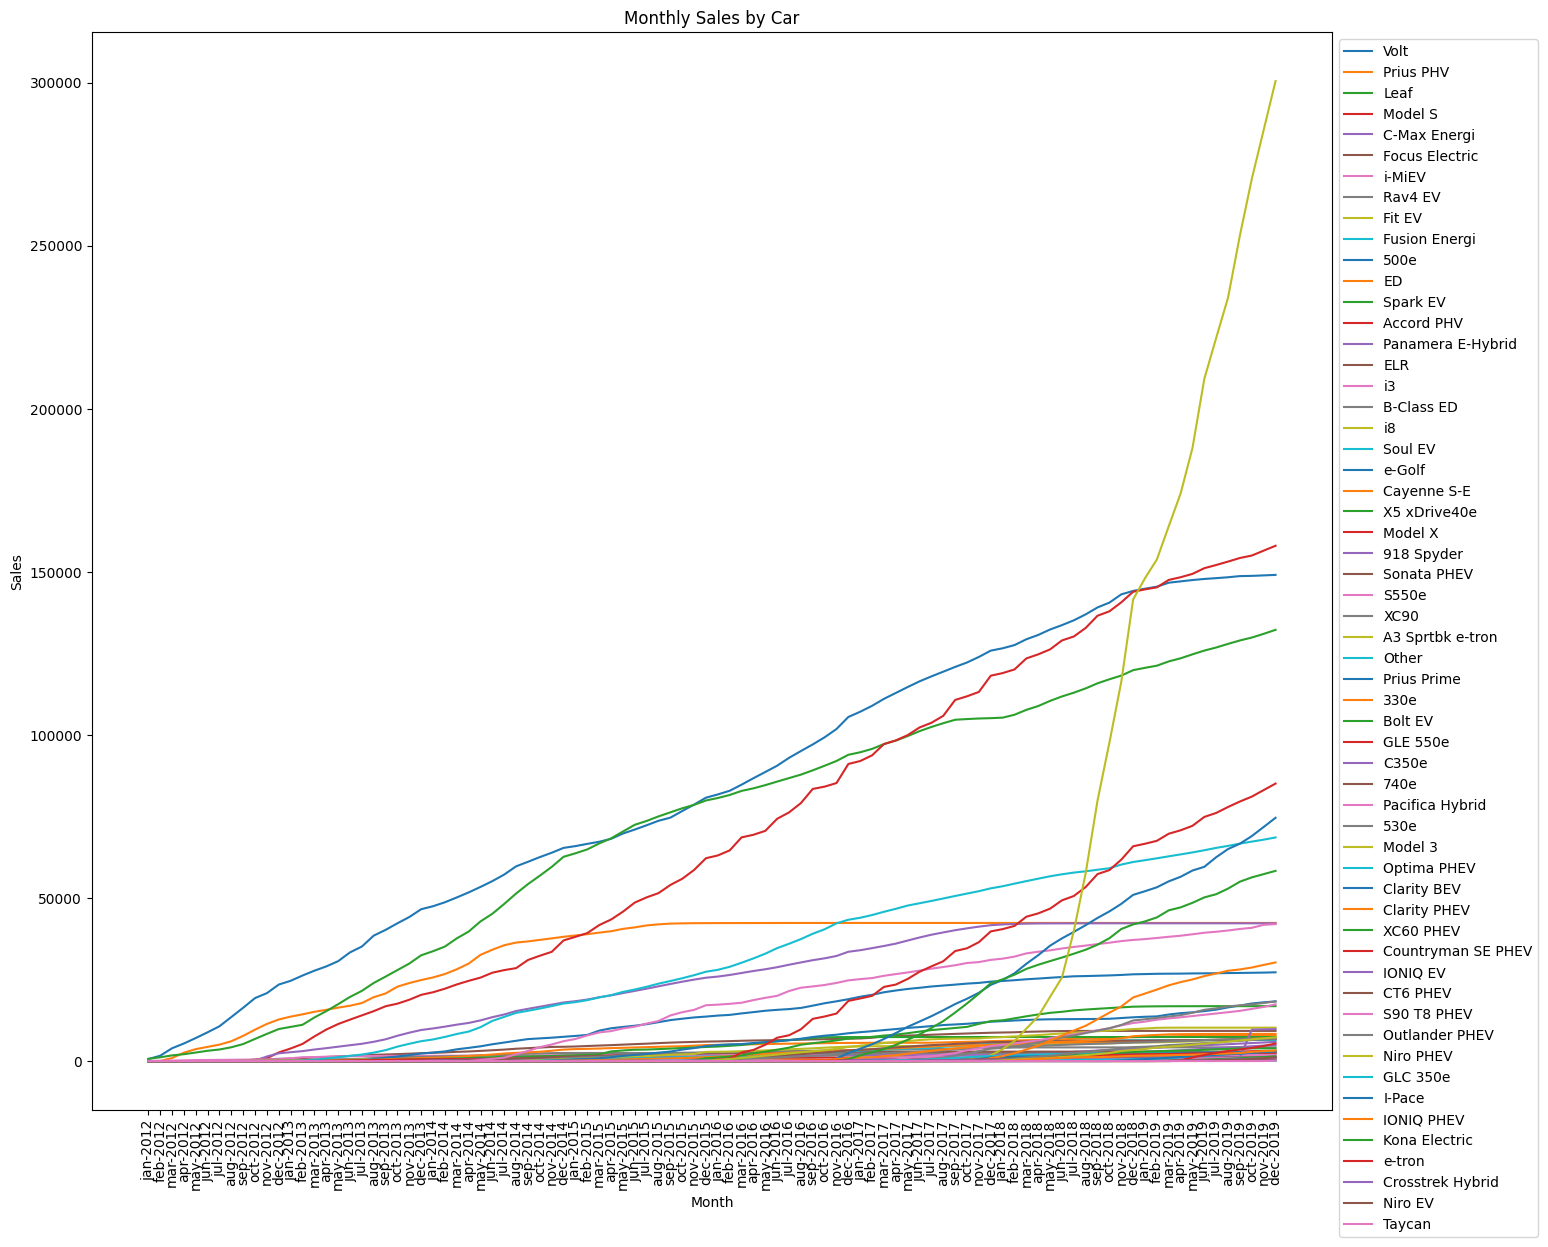

In [4]:
df1=df
car_names = df1['Model']
df_sales = df1.drop(['Make', 'Model', 'Logo'], axis=1)
plt.figure(figsize=(16, 14))
for i, row in df_sales.iterrows():
    plt.plot(row, label=car_names[i])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales by Car')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('monthly_sales_line.png', bbox_inches='tight')
plt.show()

In [5]:
date_columns = df.columns[3:]
for col in date_columns:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

monthly_sales = df[date_columns].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(monthly_sales)

jan-2012       1317.0
feb-2012       2883.0
mar-2012       6698.0
apr-2012      10263.0
may-2012      13630.0
jun-2012      16754.0
jul-2012      19783.0
aug-2012      24469.0
sep-2012      30214.0
oct-2012      37298.0
nov-2012      44053.0
dec-2012      52607.0
jan-2013      57184.0
feb-2013      62588.0
mar-2013      70570.0
apr-2013      77708.0
may-2013      85162.0
jun-2013      93454.0
jul-2013     100846.0
aug-2013     112119.0
sep-2013     121046.0
oct-2013     131101.0
nov-2013     140104.0
dec-2013     150114.0
jan-2014     155794.0
feb-2014     162824.0
mar-2014     172474.0
apr-2014     181369.0
may-2014     193731.0
jun-2014     205794.0
jul-2014     217036.0
aug-2014     229208.0
sep-2014     240129.0
oct-2014     249868.0
nov-2014     259514.0
dec-2014     272552.0
jan-2015     278609.0
feb-2015     285560.0
mar-2015     295901.0
apr-2015     304995.0
may-2015     316535.0
jun-2015     326899.0
jul-2015     335850.0
aug-2015     344822.0
sep-2015     354956.0
oct-2015  

In [6]:
df[date_columns]

,jan-2012,feb-2012,mar-2012,apr-2012,may-2012,jun-2012,jul-2012,aug-2012,sep-2012,oct-2012,...,mar-2019,apr-2019,may-2019,jun-2019,jul-2019,aug-2019,sep-2019,oct-2019,nov-2019,dec-2019
0,603.0,1626.0,3915.0,5377.0,7057.0,8817.0,10666.0,13497.0,16348.0,19309.0,...,146667.0,147072.0,147481.0,147813.0,148063.0,148337.0,148687.0,148757.0,148907.0,149057.0
1,0.0,21.0,912.0,2566.0,3652.0,4347.0,5035.0,6082.0,7734.0,9623.0,...,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0,42345.0
2,676.0,1154.0,1733.0,2103.0,2613.0,3148.0,3543.0,4228.0,5212.0,6791.0,...,122534.0,123485.0,124701.0,125857.0,126795.0,127912.0,128960.0,129847.0,130987.0,132214.0
3,0.0,0.0,0.0,0.0,0.0,12.0,31.0,74.0,160.0,460.0,...,147517.0,148342.0,149367.0,151117.0,152092.0,153142.0,154242.0,154992.0,156492.0,157992.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,...,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0,42231.0
5,2.0,2.0,2.0,2.0,8.0,97.0,135.0,169.0,228.0,346.0,...,9242.0,9242.0,9242.0,9242.0,9242.0,9242.0,9242.0,9242.0,9242.0,9242.0
6,36.0,80.0,136.0,215.0,300.0,333.0,366.0,403.0,439.0,469.0,...,2028.0,2028.0,2028.0,2028.0,2028.0,2028.0,2028.0,2028.0,2028.0,2028.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,108.0,...,2472.0,2472.0,2472.0,2472.0,2472.0,2472.0,2472.0,2472.0,2472.0,2472.0
8,0.0,0.0,0.0,0.0,0.0,0.0,7.0,16.0,32.0,48.0,...,1069.0,1069.0,1069.0,1069.0,1069.0,1069.0,1069.0,1069.0,1069.0,1069.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62774.0,63359.0,63964.0,64639.0,65359.0,65979.0,66679.0,67279.0,67879.0,68557.0


In [8]:
monthly_sales.index = pd.to_datetime(monthly_sales.index, format='%b-%Y').strftime('%d-%m-%Y')
monthly_sales.to_csv('sales_data.csv', header=['Sales'])

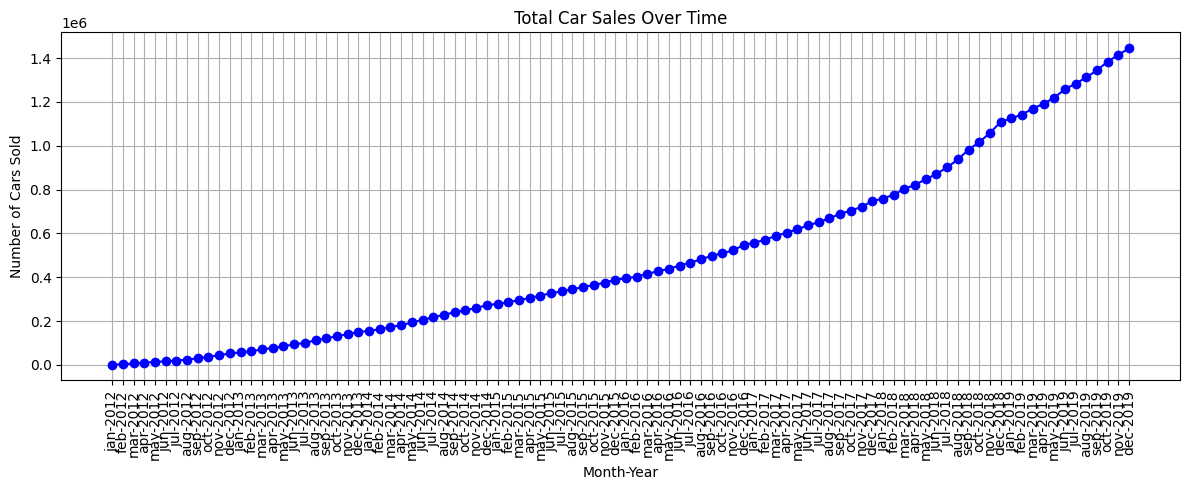

In [9]:
date_columns = df.columns[3:]
for col in df.columns[3:]:
    df[col] = df[col].astype(str).str.replace(",", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

monthly_sales = df[date_columns].sum()

plt.figure(figsize=(12, 5))
plt.plot(date_columns, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Total Car Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90) 
plt.grid(True)
plt.tight_layout() 
plt.show()

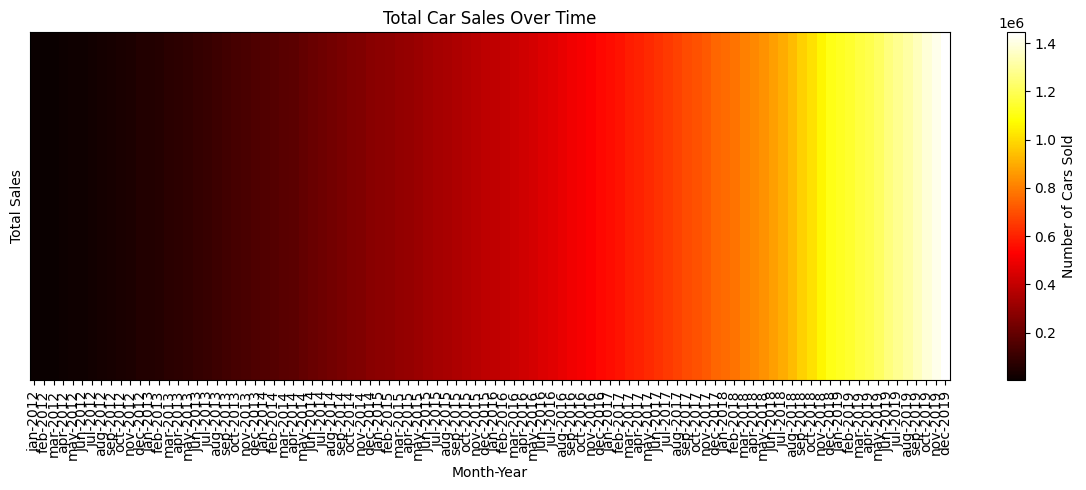

In [10]:
monthly_sales_2d = np.array(monthly_sales).reshape(1, -1) # Reshape monthly_sales into a 2D array for heatmap

plt.figure(figsize=(12, 5))
plt.imshow(monthly_sales_2d, cmap='hot', aspect='auto')
plt.colorbar(label='Number of Cars Sold')
plt.title('Total Car Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(np.arange(len(date_columns)), date_columns, rotation=90)
plt.yticks([])
plt.tight_layout()
plt.show()

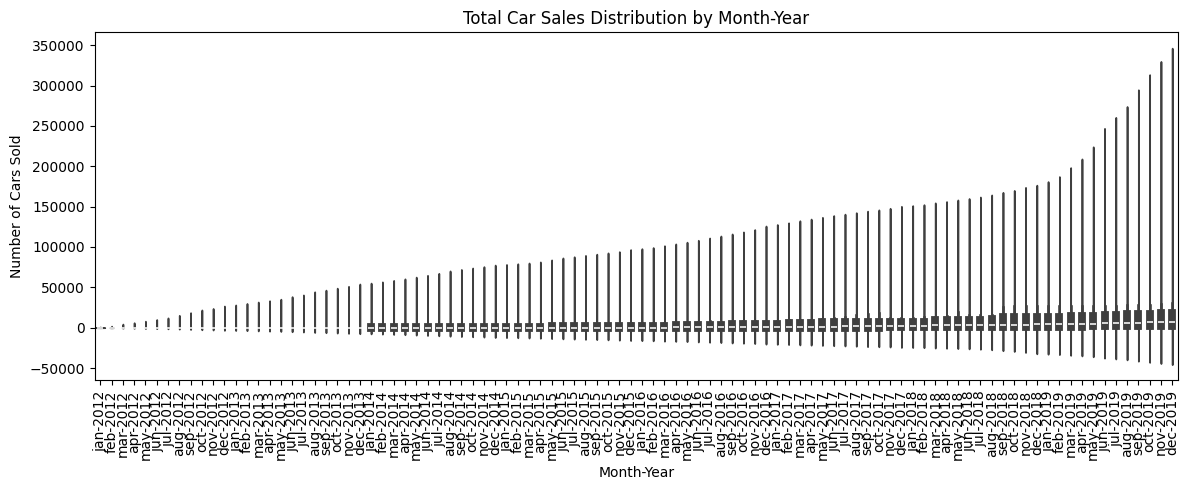

In [11]:
df_melted = df.melt(value_vars=date_columns, var_name='Month-Year', value_name='Number of Cars Sold')

plt.figure(figsize=(12, 5))
sns.violinplot(x='Month-Year', y='Number of Cars Sold', data=df_melted)
plt.title('Total Car Sales Distribution by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

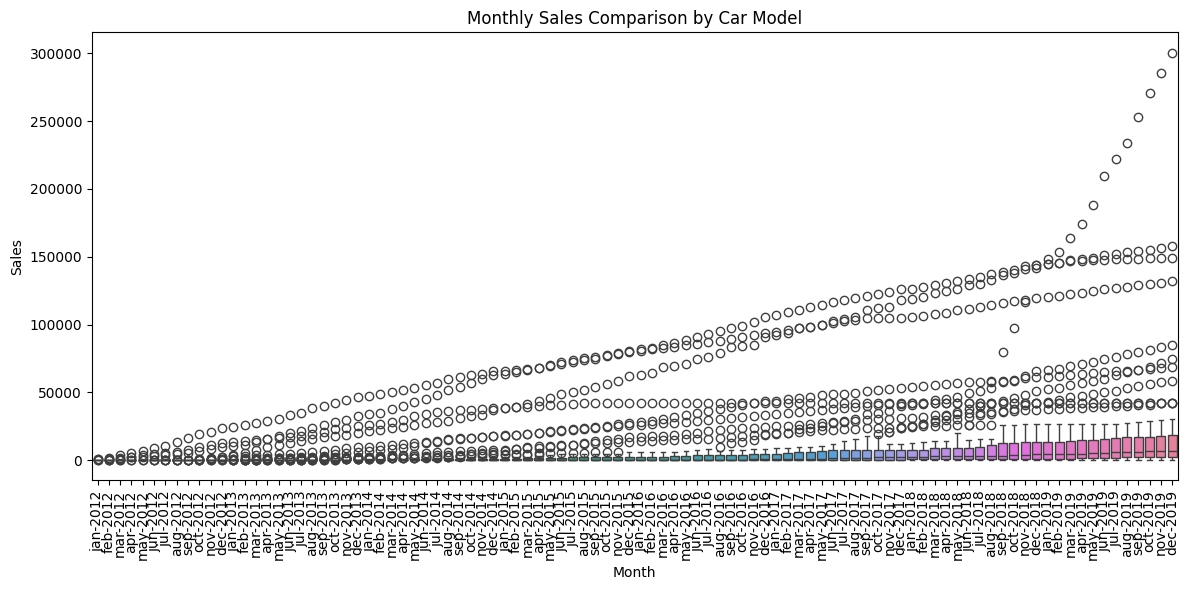

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains monthly sales data for each car model

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(['Make', 'Logo'], axis=1))
plt.title('Monthly Sales Comparison by Car Model')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


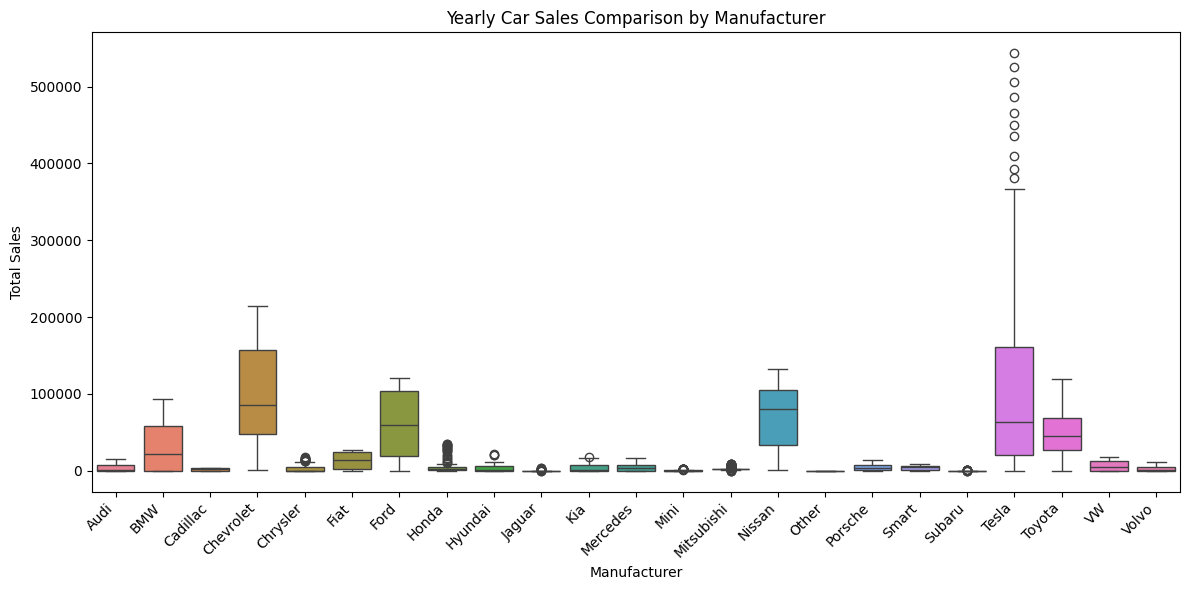

In [13]:
yearly_sales = df.groupby('Make')[date_columns].sum()

yearly_sales = yearly_sales.T

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=yearly_sales)
plt.title('Yearly Car Sales Comparison by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Yearly Car Sales Comparison by Manufacturer.png')
plt.show()
